# Experimento de la doble rendija 

En el experimento de la doble rendija, la idea es observar cómo las ondas interfieren entre sí al pasar por dos rendijas, generando un patrón de interferencia característico de muchas "franjas" en la pantalla. Las zonas donde las ondas se suman se ven más brillantes (máximos de interferencia), y donde se cancelan, hay zonas oscuras (mínimos de interferencia).


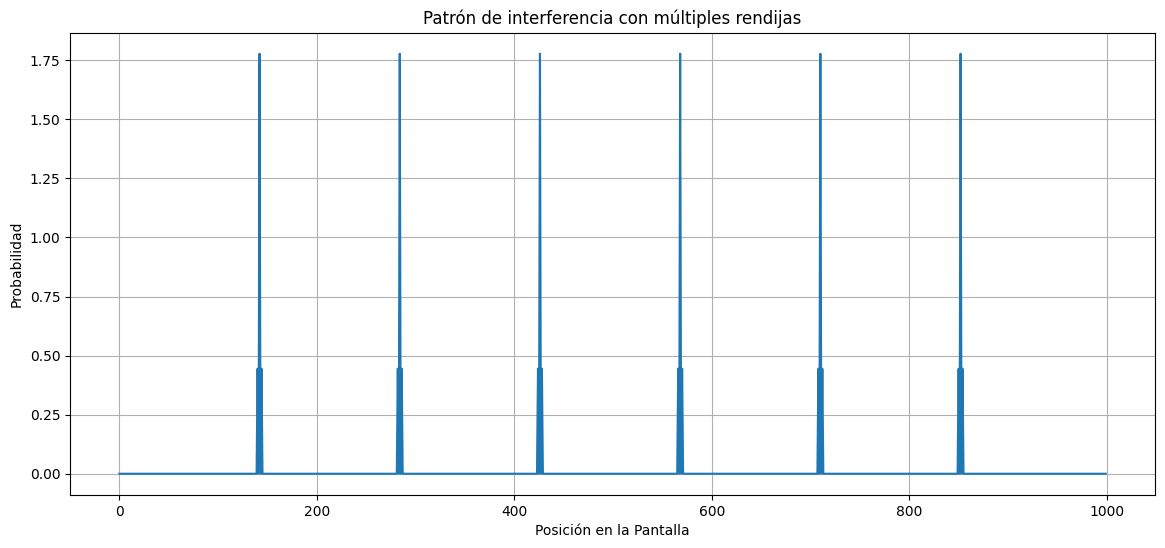

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Aumentamos el tamaño de la pantalla para una mayor resolución
screen_size = 1000  # Tamaño de la pantalla

# Creamos una matriz donde simularemos el paso de la onda
double_slit_matrix = np.zeros((3, screen_size), dtype=np.complex128)

# Definimos múltiples posiciones para simular varias rendijas
num_rendijas = 6  # Número de rendijas deseadas
separacion = screen_size // (num_rendijas + 1)

for n in range(1, num_rendijas + 1):
    rendija_pos = n * separacion
    double_slit_matrix[0, rendija_pos] = 1.0 + 0.0j  # Agregamos amplitud inicial

# Propagamos la amplitud a través de la segunda fila (simulando la interferencia)
propagation_factor = np.sqrt(1.5)  # Ajustar este factor para interferencia

for i in range(screen_size):
    if i > 0:
        double_slit_matrix[1, i] += double_slit_matrix[0, i - 1] / propagation_factor
    if i < screen_size - 1:
        double_slit_matrix[1, i] += double_slit_matrix[0, i + 1] / propagation_factor

# En la tercera fila, calculamos la interferencia final en la pantalla
for i in range(screen_size):
    if i > 0:
        double_slit_matrix[2, i] += double_slit_matrix[1, i - 1] / propagation_factor
    if i < screen_size - 1:
        double_slit_matrix[2, i] += double_slit_matrix[1, i + 1] / propagation_factor

# Calculamos la probabilidad (valor absoluto al cuadrado de la amplitud)
probability_distribution = np.abs(double_slit_matrix[2, :])**2

# Graficamos la probabilidad de observar una partícula en la pantalla
plt.figure(figsize=(14, 6))  # Aumentamos el tamaño de la figura
plt.plot(probability_distribution)
plt.title("Patrón de interferencia con múltiples rendijas")
plt.xlabel("Posición en la Pantalla")
plt.ylabel("Probabilidad")
plt.grid(True)
plt.show()
